In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [196]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10

    def reset(self):
        # Reset stochastic to 0, i.e., make it a deterministic env
        self.stochastic = 0
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        #obstacle1
        self.obstacle1_pos = [1,2]
        #obstacle2
        self.obstacle2_pos = [3,0]
        #reward2
        self.reward2_pos = [1,3]
        #reward3
        self.reward3_pos = [2,1]
        #reward4
        self.reward4_pos = [3,2]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.6
        self.state[tuple(self.obstacle1_pos)] = 0.4
        self.state[tuple(self.obstacle2_pos)] = 0.4
        self.state[tuple(self.reward2_pos)] = 0.7
        self.state[tuple(self.reward3_pos)] = 0.7
        self.state[tuple(self.reward4_pos)] = 0.7
        self.reward_pos_list = [self.reward2_pos, self.reward3_pos, self.reward4_pos]
        observation = self.state.flatten()
        return observation

    def step(self, action):
        self.timestep += 1
        already_done = True if (np.array(self.agent_pos) == self.goal_pos).all() else False
        
        # Down        
        if action == 0:
            if(self.stochastic):
                self.agent_pos[0] += np.random.choice(np.array([0,1]), 1, p=[0.05, 0.95])[0]
            else:
                self.agent_pos[0] += 1
        # Up        
        if action == 1:
            if(self.stochastic):
                self.agent_pos[0] -= np.random.choice(np.array([0,1]), 1, p=[0.05, 0.95])[0]
            else:
                self.agent_pos[0] -= 1
        # Right
        if action == 2:
            if(self.stochastic):
                self.agent_pos[1] += np.random.choice(np.array([0,1]), 1, p=[0.05, 0.95])[0]
            else:
                self.agent_pos[1] += 1
        # Left
        if action == 3:
            if(self.stochastic):
                self.agent_pos[1] -= np.random.choice(np.array([0,1]), 1, p=[0.05, 0.95])[0]
            else:
                self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3).tolist()
        
        self.state = np.zeros((4,4))
        self.state[tuple(self.goal_pos)] = 0.05
        self.state[tuple(self.obstacle1_pos)] = 0.4
        self.state[tuple(self.obstacle2_pos)] = 0.4
        self.state[tuple(self.reward2_pos)] = 0.7
        self.state[tuple(self.reward3_pos)] = 0.7
        self.state[tuple(self.reward4_pos)] = 0.7
        self.state[tuple(self.agent_pos)] = 1
        observation = self.state.flatten()
        reward = 0
        obstacle_pos_list = [self.obstacle1_pos, self.obstacle2_pos]

        if (np.array(self.agent_pos) == self.goal_pos).all():
            reward = 3
        elif (self.agent_pos in obstacle_pos_list):
            reward = -1
        elif (self.agent_pos in self.reward_pos_list):
            self.reward_pos_list.remove(self.agent_pos)
            reward = 1

        done = True if ((self.timestep >= self.max_timesteps) or self.agent_pos == self.goal_pos) else False
        info = []
        
        #Agent shouldn't keep running after we're already done, enforce it.
        if already_done:
            reward = -3

        return observation, reward, done, info
    
    def set_stochastic(self):
        self.stochastic = 1

    def render(self):
        plt.imshow(self.state, cmap='turbo')
        
    def get_agent_pos(self):
        pos = self.agent_pos
        return pos
    
    def get_reward_pos(self):
        pos = self.reward_pos_list
        return pos

In [197]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation):
        return np.random.choice(self.action_space.n)

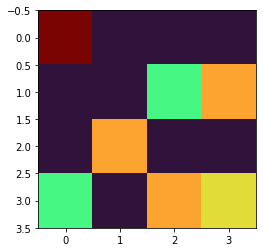

In [206]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
env.render()

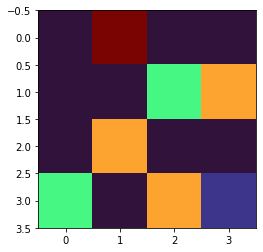

<IPython.core.display.Javascript object>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total reward = 0


In [207]:
#Random agent demo for 10 time steps (since max_timestep = 10)
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
rewards = []
done = False
while not done:
    action = agent.step(obs)
    observation, reward, done, info = env.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

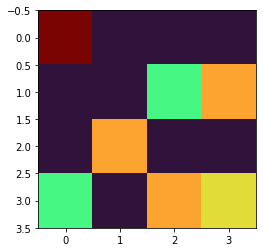

In [67]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
env.set_stochastic()
env.render()

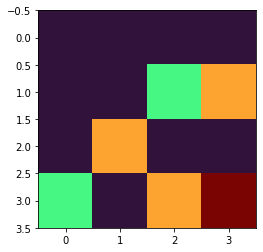

<IPython.core.display.Javascript object>

[0, 0, 0, 0, -1, 0, -1, 0, 1, 3]
Total reward = 2


In [183]:
#Random agent demo for 10 time steps in stochastic env (since max_timestep = 10)
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
rewards = []
done = False
while not done:
    action = agent.step(obs)
    observation, reward, done, info = env.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

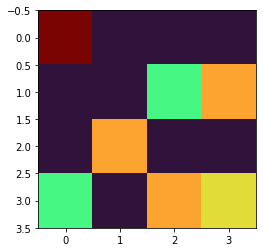

In [368]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
env.render()

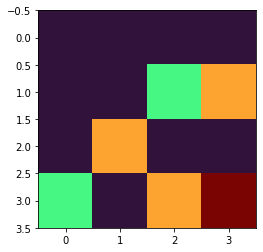

<IPython.core.display.Javascript object>

[0, 0, 1, 0, 1, 3]
Total reward = 5


In [369]:
# 11 step demo to show logical progression in the env
output_grid = widgets.Grid(1, 1)
rewards = []
for action in [0, 2, 0, 0, 2, 2]:
    observation, reward, done, info = env.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

# Note below the reward for the last action is -3 even though the agent remains in goal position.
# This is because the max time steps(10) have expired and further steps are penalised.
# The idea here is that the agent should learn to stop after max time steps, to avoid these penalties.

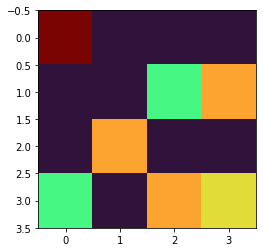

In [328]:
env = GridEnvironment()
obs = env.reset()
env.set_stochastic()
env.render()

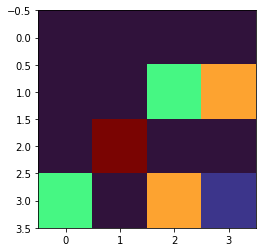

<IPython.core.display.Javascript object>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Total reward = 1


In [94]:
#In a stochastic env with the same steps/actions we might get a different reward.
output_grid = widgets.Grid(1, 1)
rewards = []
for action in [2, 0, 2, 2, 1, 1, 0, 0, 0]:
    observation, reward, done, info = env.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

In [587]:
#1


import random

# Ref from article - https://jamesmccaffrey.wordpress.com/2017/11/30/the-epsilon-greedy-algorithm/
def compute_next_action_with_decay(state, q_table, epsilon):
    rand = random.random()
    
    if rand < epsilon:
        return random.randint(0, 3)
    
    else:
        return np.argmax(q_table[state])
      

def q_learning(myenv, train_episode_count, alpha=0.1, discount_factor=0.8, epsilon=1.0, stochastic=False):
    q_table = np.zeros((16, 4))
    policy = []
    epsilon_list = []
    reward_per_episode = []

    # of episodes
    for _ in range(0, train_episode_count):
        # reset for a new episode
        myenv.reset()
        if(stochastic):
            myenv.set_stochastic()
        
        # decay epsilon
        epsilon *= (1-0.00002)**_
        epsilon_list.append(epsilon)
        #epsilon = 0.1
        
        policy.clear()
        
        episode_total_reward = 0
        
        for __ in range(0, 10):
            start_pos = myenv.get_agent_pos()
            state = start_pos[0]*4 + start_pos[1]
            
            # get greedy action from q_table based on epsilon
            action = compute_next_action_with_decay(state, q_table, epsilon)
            observation, reward, done, info = myenv.step(action)
            end_pos = myenv.get_agent_pos()
            episode_total_reward += reward
            
            policy.append(action)    
            
            end_state = end_pos[0]*4 + end_pos[1] 

            best_action = np.argmax(q_table[end_state, :])
            max_q = q_table[end_state, best_action]

            q_table[state][action] = q_table[state][action] + alpha*(reward + discount_factor * max_q - q_table[state][action])

            if done:
                break
                
        reward_per_episode.append(episode_total_reward)        
                
    return policy, q_table, epsilon_list, reward_per_episode     


def sarsa(myenv, train_episode_count, alpha=0.1, discount_factor=0.8, epsilon=1.0, stochastic=False):
    q_table = np.zeros((16, 4))
    policy = []
    epsilon_list = []
    reward_per_episode = []

    # of episodes
    for _ in range(0, train_episode_count):
        # reset for a new episode
        myenv.reset()
        if(stochastic):
            myenv.set_stochastic()
        
        # decay epsilon
        epsilon *= (1-0.00002)**_
        epsilon_list.append(epsilon)
        #epsilon = 0.1
        
        policy.clear()
        
        episode_total_reward = 0
        
        for __ in range(0, 10):
            start_pos = myenv.get_agent_pos()
            state = start_pos[0]*4 + start_pos[1]
            
            # get greedy action from q_table based on epsilon
            action = compute_next_action_with_decay(state, q_table, epsilon)
            observation, reward, done, info = myenv.step(action)
            end_pos = myenv.get_agent_pos()
            end_state = end_pos[0]*4 + end_pos[1]
            episode_total_reward += reward
            
            policy.append(action)    
            
            end_state = end_pos[0]*4 + end_pos[1] 
            next_action = compute_next_action_with_decay(end_state, q_table, epsilon)

            policy_q = q_table[end_state, next_action]

            q_table[state][action] = q_table[state][action] + alpha*(reward + discount_factor * policy_q - q_table[state][action])

            if done:
                break
                
        reward_per_episode.append(episode_total_reward)        
                
    return policy, q_table, epsilon_list, reward_per_episode    

In [588]:
import pandas as pd
import plotly.express as px

def plot_graph(epsilon_list, x_axis, y_axis):
    data = {x_axis :[k for k, val in enumerate(epsilon_list)], y_axis:epsilon_list}
    df = pd.DataFrame(data)
    fig = px.line(df, x=x_axis, y=y_axis)
    fig.show()

In [620]:
myenv = GridEnvironment()
greedy_policy, q_table, epsilon_list, reward_per_episode = q_learning(myenv, train_episode_count=1000)


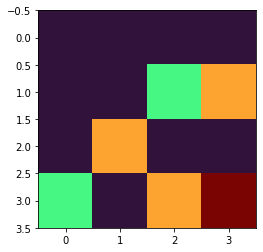

<IPython.core.display.Javascript object>

[0, 0, 1, 0, 1, 3]
Total reward = 5


In [543]:
# Execute the learned greedy policy
myenv.reset()
output_grid = widgets.Grid(1, 1)
rewards = []

for action in greedy_policy:
    observation, reward, done, info = myenv.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        myenv.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

In [590]:
myenv = GridEnvironment()
greedy_policy_stochastic, q_table_stochastic, epsilon_list_stochastic, reward_per_episode_stochastic \
= q_learning(myenv, train_episode_count=1000, stochastic=True)

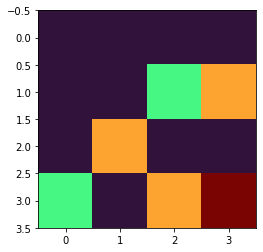

<IPython.core.display.Javascript object>

[0, 0, 1, 0, 1, 3]
Total reward = 5


In [591]:
# Execute the learned greedy policy
myenv.reset()
myenv.set_stochastic()
output_grid = widgets.Grid(1, 1)
rewards = []

for action in greedy_policy:
    observation, reward, done, info = myenv.step(action)
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        myenv.render()
    rewards.append(reward)
    time.sleep(1)
print(rewards)
print("Total reward =", sum(rewards))

In [621]:
plot_graph(epsilon_list, 'Train #', 'Epsilon')

In [622]:
plot_graph(reward_per_episode, 'Episode #', 'Total Reward') 

In [594]:
plot_graph(epsilon_list_stochastic, 'Train #', 'Epsilon')

In [595]:
plot_graph(reward_per_episode_stochastic, 'Episode #', 'Total Reward') 

In [596]:
myenv = GridEnvironment()
sarsa_policy, q_table_sarsa, epsilon_list_sarsa, reward_per_episode_sarsa \
= sarsa(myenv, train_episode_count=1000)

In [597]:
plot_graph(epsilon_list_sarsa, 'Train #', 'Epsilon')

In [606]:
plot_graph(reward_per_episode_sarsa, 'Episode #', 'Total Reward') 

In [599]:
myenv = GridEnvironment()
sarsa_policy_stochastic, q_table_stochastic_sarsa, epsilon_list_stochastic_sarsa, reward_per_episode_stochastic_sarsa \
= sarsa(myenv, train_episode_count=1000, stochastic=True)

In [600]:
plot_graph(epsilon_list_stochastic_sarsa, 'Train #', 'Epsilon')

In [601]:
plot_graph(reward_per_episode_stochastic_sarsa, 'Episode #', 'Total Reward') 

## Question 1.5 - Provide the evaluation results. Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learnt policy. Plot should include the total reward per episode.



    

### Deterministric env

In [602]:
myenv = GridEnvironment()
reward_10_episode = []
for _ in range(0, 10):
    total_reward = 0
    myenv.reset()
    for action in greedy_policy:
        observation, reward, done, info = myenv.step(action)
        total_reward += reward
    reward_10_episode.append(total_reward)
    
plot_graph(reward_10_episode, x_axis='Episode #', y_axis='Total reward')    
        

### Stochastic env

In [604]:
myenv = GridEnvironment()
reward_10_episode = []
for _ in range(0, 10):
    total_reward = 0
    myenv.reset()
    myenv.set_stochastic()
    for action in greedy_policy_stochastic:
        observation, reward, done, info = myenv.step(action)
        total_reward += reward
    reward_10_episode.append(total_reward)
    
plot_graph(reward_10_episode, x_axis='Episode #', y_axis='Total reward')    

## Q2 - Compare the performance of both algorithms on the same deterministic environment (e.g. show one graph with two reward dynamics) and give your interpretation of the results.

In [609]:
data = {'Episodes #' :[k for k, val in enumerate(reward_per_episode)], 'Total reward q_learning':reward_per_episode, 'Total reward sarsa':reward_per_episode_sarsa}
df = pd.DataFrame(data)
pd.options.plotting.backend = "plotly"
df.plot(x='Episodes #', y=['Total reward q_learning', 'Total reward sarsa'])


The total reward sarsa(red) line fluctuates more due to not choosing the max q values greedily during the exploration part of the training. Not calculating the prediction with the max q value for the state also causes the red line to converge towards the max reward relatively slower as compared to the q learning(blue line) which makes. Some late fluctuations in q_learning reward are potentially due to epsilon induced randomness.

However, it is interesting that sarsa also converges to the same maximum, albeit a few episodes later.

## Q3 - Compare how both algorithms perform in the same stochastic environment (e.g. show one graph with two reward dynamics) and give your interpretation of the results.

In [610]:
data = {'Episodes #' :[k for k, val in enumerate(reward_per_episode)], 'Total reward deterministic':reward_per_episode_stochastic, 'Total reward stochastic':reward_per_episode_stochastic_sarsa}
df = pd.DataFrame(data)
pd.options.plotting.backend = "plotly"
df.plot(x='Episodes #', y=['Total reward deterministic', 'Total reward stochastic'])


Both, current and the next, action in sarsa are calculated using epsilon greedy method which introduces randomness based on the epsilon value. Couple that with a stochastic env, sarsa seems to have more random poor reward episodes even as it continuea to converge.
While this q learning in above graph seems to have converged even quicker than that for a deterministic env, that is probably just upto chance since epsilon greedy method does bring in some randomness. But as epison decays the randomness also reduces rather quickly, compared to sarsa.

## Q4- Briefly explain the tabular methods, including Q-learning, that were used to solve the problems. Provide their update functions and key features.

### Q-learning

### SARSA

## Hyperparameter Tuning Bonus 

###  Epsilon decay rate

In [518]:
def plot_epsilon(decay):
    epsilon_list = []
    epsilon = 1.0
    for _ in range(0, 1000):
        epsilon *= (1-decay)**_
        epsilon_list.append(epsilon)
    data = {'train #':[k for k in range(0, 1000)], 'Epsilon':epsilon_list}
    df = pd.DataFrame(data)
    fig = px.line(df, x='train #', y='Epsilon', title=f'Decay rate is: {decay}')
    fig.show()

# Different decay_rates    
plot_epsilon(0.03)
plot_epsilon(0.007)
plot_epsilon(0.000005)
plot_epsilon(0.00005)

### Corresponding reward graphs

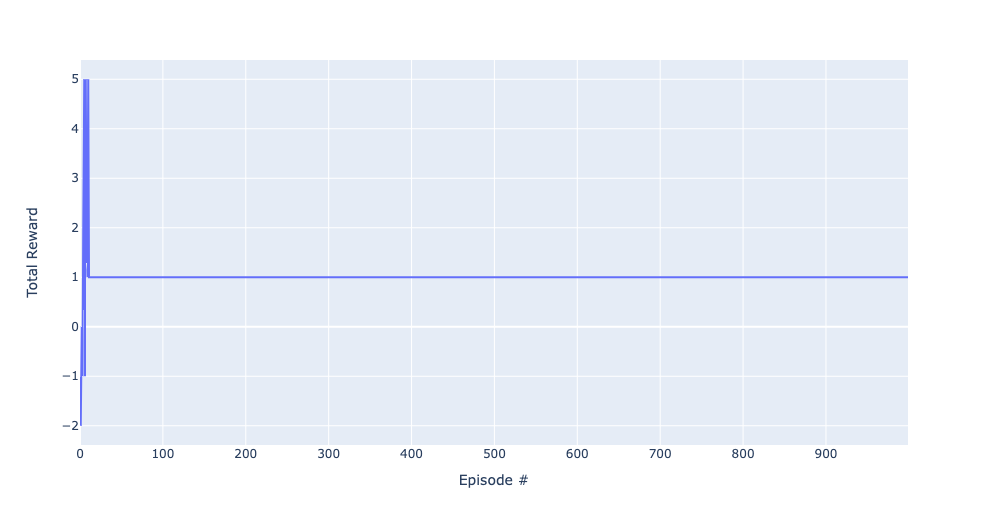
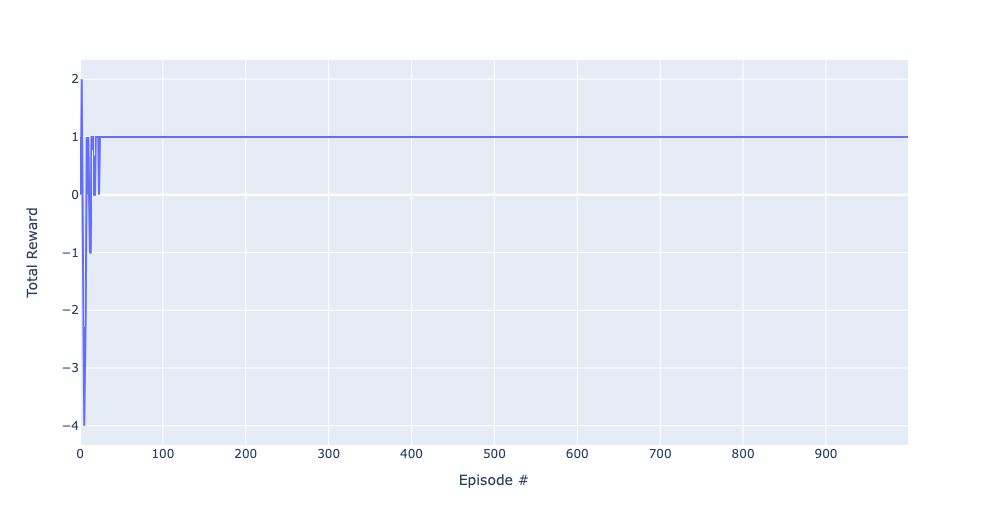
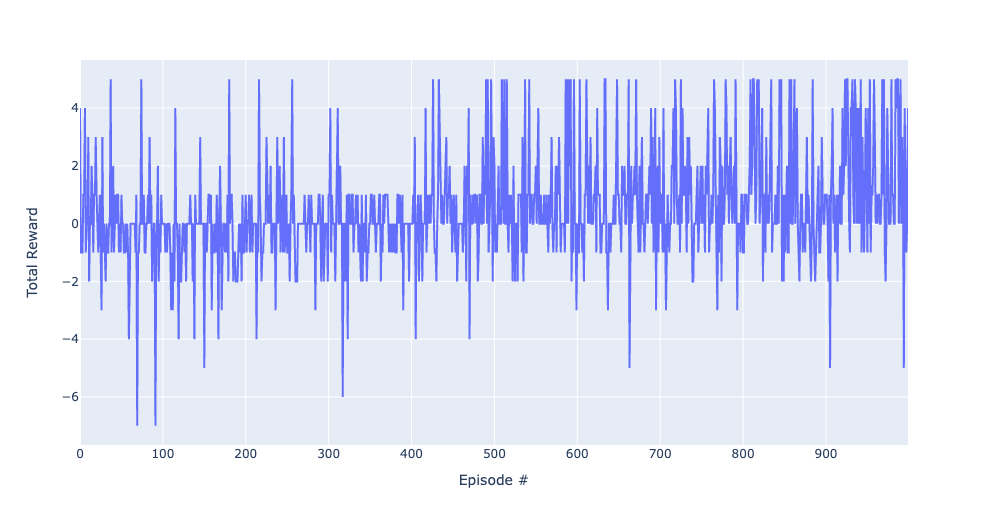
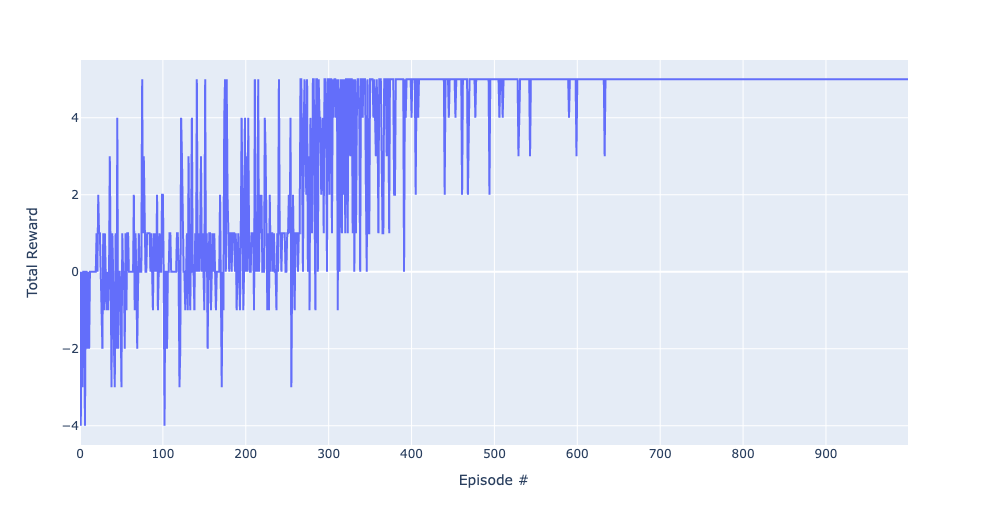

When my epsilon was 0.03, my agent wasn't reaching the goal since the agent was exploring for long enough to find the best possible path as seen in the corresponding graph(steep slope). With the decay rate 0.000005, the slope was very gentle and my agent again wasn't reaching the goal as epsilon was still big enough towards the latter episodes to cause frequent spurts of random behaviour(exploration).

For epsilon=0.00002, the slope produced was much smoother causing a gradual transition to exploitation. Epsilon was converging to ~ 0, roughly around ~ 70% through the episodes(~ 700) which seemed like the right spot to only do exploitation. So this, was chosen as the decay rate for epsilon.

Note - I have used the exponential decay formula to calculate epsilon for each training episode.

### Number of episodes

First we must note that number of episodes and epsilon decay are related in this case since we use exponential decay. For this experiment the epsilon decay rate was fixed to 0.00002 which was decided at optimum earlier.

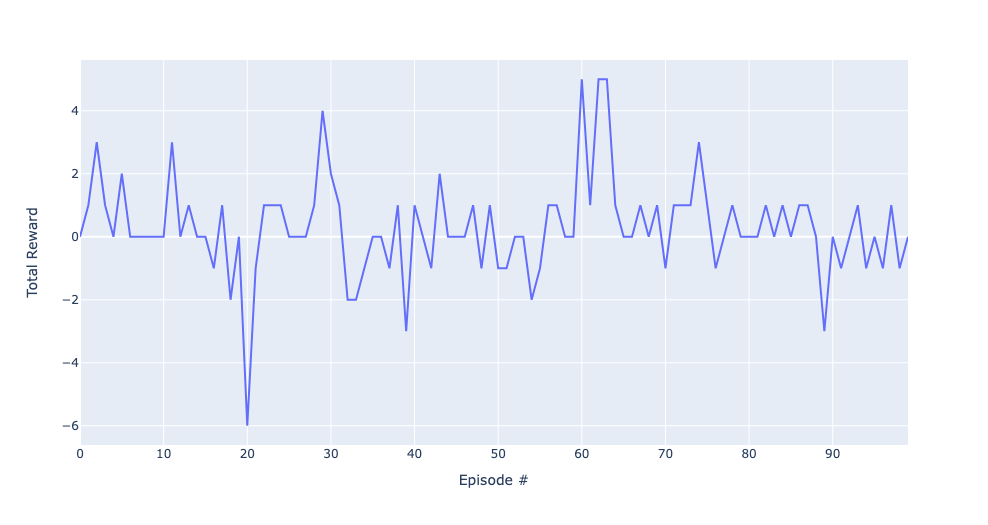
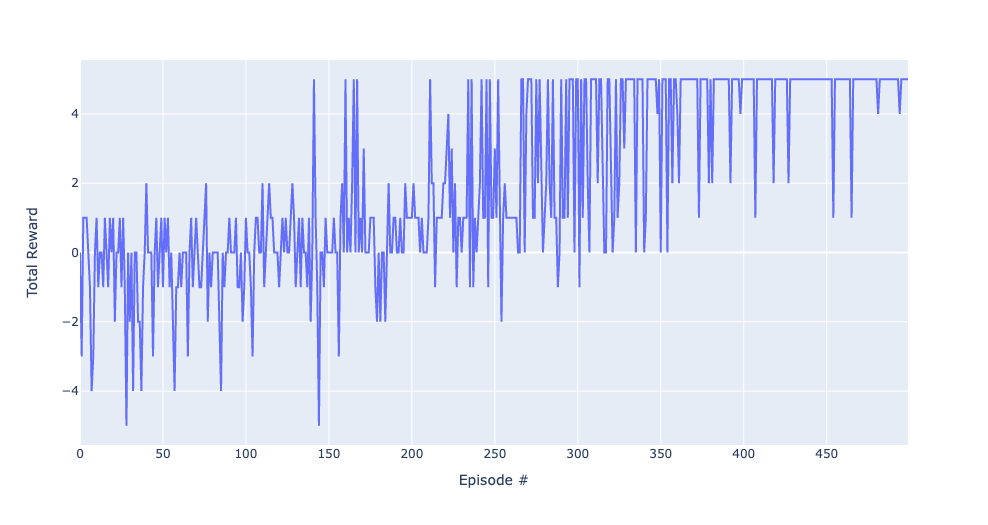
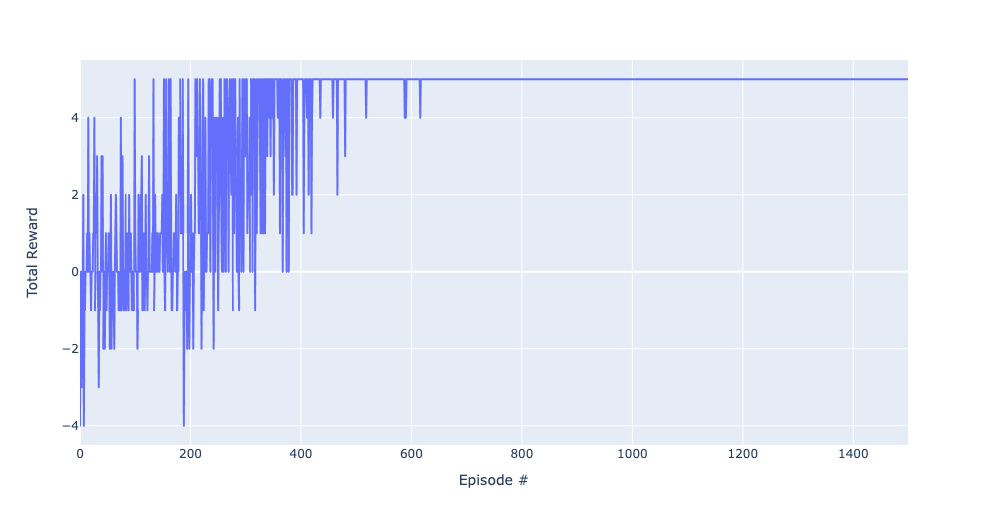
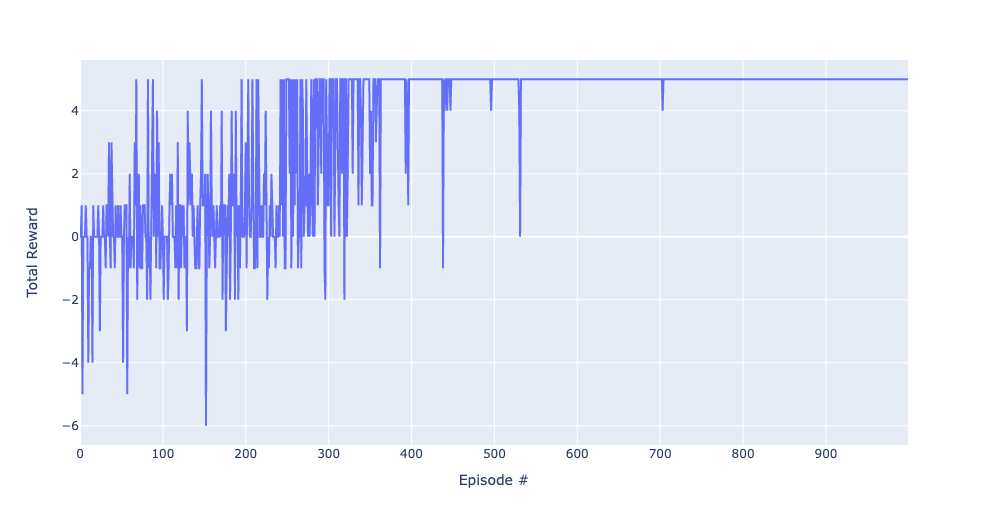

When we train for 100 episodes we can see that rewards haven't convert much even in the latter iterations, for 500 episodes the rewards seem to have just converged towards the end episodes.

Third graph is 1500 iterations, where the rewards seem to converge around 600 mark so we just seem to be wasting iterations at this point. Finally for 1000, iteration we see that the rewards converge the same mark (a later fluctuation might be due to randomness in the epsilon greedy policy). Since that's also doesn't happen for this training after roughly ~70% of the episodes we chose 1000 iterations as the optimal number.